<h1>Data Final Part</h1>

<p>In the first part of data project, I tried to achive several things. I started the project with data preprocesing. First of all I checked the data set is imbalanced or balanced. I add random data for making data set balanced. After, training and test data set is standralized and normalized. The datasets are seperate to put into machine learning model. I tried to apply Logistic Regression and NN with K-fold. </p>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

<h2>Data Preprocessing</h2>

In [3]:
# Obtaining Training Data Set 
training_set = pd.read_csv("train.csv")

In [4]:
training_set.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [6]:
training_set.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [7]:
# Balancing the dataset 

In [8]:
training_set['Arrival Delay in Minutes'].fillna(training_set['Arrival Delay in Minutes'].median(axis = 0), inplace = True)

In [9]:
training_set.isna().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [10]:
# Dropping out unnecessarily columns
training_set = training_set.drop(columns = ['Unnamed: 0','id'])

In [11]:
weights_name_list = training_set.columns
training_set

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


<h3>Standardization and Normalization</h3>

In [12]:
# Standardization
def standardization(weights_name_list,t_set):
    t_set_l = t_set
    for i in weights_name_list :
        if t_set[i].dtype != object:
            t_set_l[i] = (t_set_l[i] - t_set_l[i].mean()) / t_set_l[i].std()
    return t_set_l
            


def min_max_scaling(weights_name_list,t_set):
    t_set_l = t_set
    for i in weights_name_list:
        if t_set[i].dtype != object:
            t_set_l[i] = (t_set_l[i] - t_set_l[i].min()) / (t_set_l[i].max() - t_set_l[i].min())
    return t_set_l

In [13]:
training_set = standardization(weights_name_list,training_set)
# training_set = min_max_scaling(weights_name_list,training_set)

In [14]:
training_set['Gender'].replace({'Male': 0, 'Female': 1}, inplace=True)
training_set['Customer Type'].replace({'Loyal Customer': 1, 'disloyal Customer': 0}, inplace=True)
training_set['Type of Travel'].replace({'Personal Travel': 0, 'Business travel': 1}, inplace=True)
training_set['Class'].replace({'Eco': 0, 'Eco Plus': 1, 'Business': 2}, inplace=True)
training_set['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1}, inplace=True)

In [15]:
def covariance(x): 
    return np.dot(x.T,x)/(x.shape[0]-1)

<Axes: >

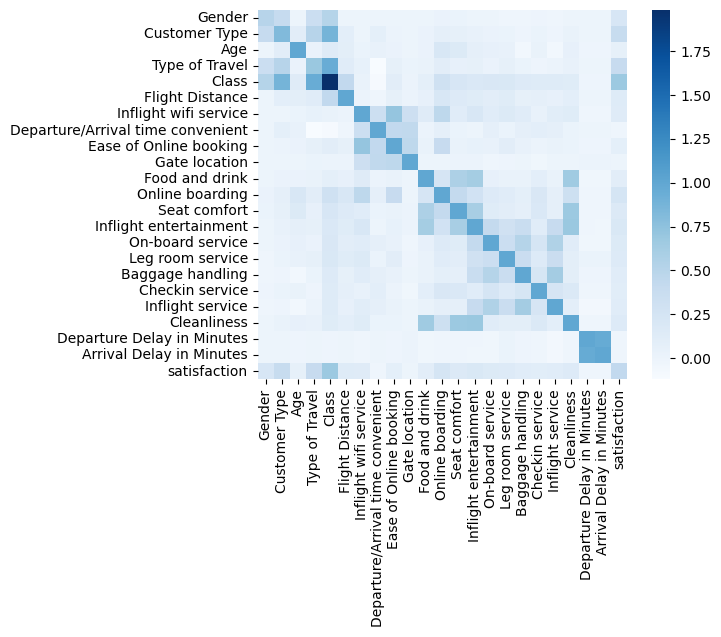

In [17]:
y = training_set['satisfaction']
training_set_encoded = training_set.drop(columns=(['satisfaction']))
weights_name_list_pre= training_set.columns
cov_mat = covariance(training_set)
sns.heatmap(cov_mat, square = True, cmap = 'Blues',xticklabels=weights_name_list_pre,yticklabels=weights_name_list_pre)

<h3>Arraning Test Set</h3>

In [18]:
test_set = pd.read_csv("test.csv")

test_set = test_set.drop(columns = ['Unnamed: 0','id'])

In [19]:
test_set.isna().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [20]:
test_set.dropna(inplace=True)
test_set.shape

(25893, 23)

In [21]:
test_set = standardization(weights_name_list,test_set)
#test_set = min_max_scaling(weights_name_list,test_set)

In [22]:
# One-Hot Encoding
test_set['Gender'].replace({'Male': 0, 'Female': 1}, inplace=True)
test_set['Customer Type'].replace({'Loyal Customer': 1, 'disloyal Customer': 0}, inplace=True)
test_set['Type of Travel'].replace({'Personal Travel': 0, 'Business travel': 1}, inplace=True)
test_set['Class'].replace({'Eco': 0, 'Eco Plus': 1, 'Business': 2}, inplace=True)
test_set['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1}, inplace=True)

In [23]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25893 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25893 non-null  int64  
 1   Customer Type                      25893 non-null  int64  
 2   Age                                25893 non-null  float64
 3   Type of Travel                     25893 non-null  int64  
 4   Class                              25893 non-null  int64  
 5   Flight Distance                    25893 non-null  float64
 6   Inflight wifi service              25893 non-null  float64
 7   Departure/Arrival time convenient  25893 non-null  float64
 8   Ease of Online booking             25893 non-null  float64
 9   Gate location                      25893 non-null  float64
 10  Food and drink                     25893 non-null  float64
 11  Online boarding                    25893 non-null  float64


In [24]:
test_set_y = test_set['satisfaction'].values
test_set_x = test_set.drop(columns=["satisfaction"])
test_set_x = test_set_x.values

In [25]:
test_set_y

array([1, 1, 0, ..., 0, 1, 0])

In [26]:
test_set_x

array([[ 1.        ,  1.        ,  0.81788254, ...,  1.29948257,
         0.96205554,  0.77987908],
       [ 1.        ,  1.        , -0.23932399, ...,  1.29948257,
        -0.38253942, -0.39290575],
       [ 0.        ,  0.        , -1.29653052, ..., -0.9743558 ,
        -0.38253942, -0.39290575],
       ...,
       [ 1.        ,  1.        , -1.49475675, ..., -0.9743558 ,
        -0.38253942, -0.39290575],
       [ 0.        ,  1.        , -1.69298297, ...,  0.54153645,
        -0.38253942, -0.39290575],
       [ 1.        ,  1.        ,  0.15712846, ..., -1.73230192,
        -0.38253942, -0.39290575]])

<h2>Logistic Regression</h2>

In [27]:
class LogisticRegression():
    def __init__(self, learning_rate, W, X,b, y, epochs):
        np.random.seed(38)
        self.learning_rate = learning_rate 
        self.W = W
        self.X = X
        self.b = b
        self.y = y
        self.epochs = epochs

    def sigmoid(self,input_x):
        result = 1/(1+ np.exp(-(np.dot(input_x,self.W)+self.b)))
        return result

    def log_loss(self,res,y_temp):
        
        cost = y_temp* np.log(res+ 1e-9) +(1-y_temp)* np.log(1-res+ 1e-9)
        return -cost.mean()

    def update_weights(self):
        
        m = self.y.size
        cost_list = []
        

        for _ in range(1,self.epochs):
            np.random.seed(38)
            start = 0
            end = 32

            # Shuffle dataset 
            indices = np.arange(self.X.shape[0])
            np.random.shuffle(indices)

            X_shuffle = self.X[indices]
            y_shuffle = self.y.values[indices]

            
            temp_cost = 0

            for _ in range(self.X.shape[0] // 32):
                X_temp = X_shuffle[start:end]
                y_temp = y_shuffle[start:end]

                res = self.sigmoid(X_temp)

                cost = self.log_loss(res,y_temp)
                temp_cost += cost
            
            
                #compute gradient w.r.t 'W' 
                dW = np.dot(X_temp.T,(res-y_temp))/m
                db = np.sum(res-y_temp)/m
            
                
                self.W = self.W - self.learning_rate * dW
                self.b = self.b - self.learning_rate * db

                start = end 
                end += 32
            
            temp_cost = temp_cost / (self.X.shape[0] // 32)
            cost_list.append(temp_cost)
            
        #plt.plot(range(1,len(cost_list)+1),cost_list)
        #plt.show()
        return cost_list

    def get_parameters(self):
        return self.W, self.b

<h3>Appling K-fold on Logistic Regression</h3>

In [28]:
def initliaze_weights_logistic(n):
    W = np.random.randn(len(n)-1)*0.01
    b = 0
    return W,b

In [29]:
def K_fold_splitting_dataset(k,training_set_encoded):
    #split the data set 
    training_set_shuffled = training_set_encoded.sample(frac = 1)
    splited_data_set = []

    m,n = training_set_shuffled.shape
    
    boundary = m // k
    for i in range(0,k):
        splited_data_set.append(training_set_shuffled.iloc[i*boundary:(i+1)*boundary])
    return splited_data_set

<h3>Validating Performance of Model </h3>

In [30]:
def confusion_matrix(actual,predicted):
    TP = 0  # True Positive
    TN = 0  # True Negative
    FP = 0  # False Positive
    FN = 0  # False Negative

    
    for a, p in zip(actual, predicted):
        if a == 1 and p == 1:
            TP += 1
        elif a == 0 and p == 0:
            TN += 1
        elif a == 0 and p == 1:
            FP += 1
        elif a == 1 and p == 0:
            FN += 1
    
    
    return {"TP": TP,"TN": TN,"FP": FP,"FN": FN}               

In [31]:
def calculate_metrics(conf_matrix):
    TP = conf_matrix['TP']
    TN = conf_matrix['TN']
    FP = conf_matrix['FP']
    FN = conf_matrix['FN']
    
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    

    return {
        "Accuracy": accuracy,
        "Precission": precision,
        "Recall": recall,
        "F1 Score ": f1_score
    } 

In [32]:
def print_calculated_metrcis(cm):

    accuracy = cm["Accuracy"]
    precision = cm["Precission"]
    recall = cm["Recall"]
    f1_score = cm["F1 Score "]
    
    
    print("\nMetrics:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1_score:.2f}")

    return

<h3>Running on test dataset</h3>

In [33]:
# Determine Hyperparameters
learning_rate = [0.1]
iteration = [1000]
threshold_list = [0.6]

splited_data_set= K_fold_splitting_dataset(5,training_set)

record_list = []
temp = []
temp_mean =[]
result_k_flod = []
weights_list = []
bias_list = []



# Selecting Hyperparameters
for threshold in threshold_list:
    for l_i in learning_rate:
        for each_iteration in iteration:
            #Initliaze weights 
            # Apply Algorithms on K-1
            temp_store_values = []
            W,b = initliaze_weights_logistic(weights_name_list)
            start_time = time.time()
            print(f"Learning parameter {l_i} and iteration {each_iteration} and threshold {threshold} ")
            for each_split in range(0,len(splited_data_set)):
                # Taking out validation set
                for t_i in range(0,len(splited_data_set)):
                    if t_i != each_split:
                        temp.append(splited_data_set[t_i])
                    else:
                        val_set = splited_data_set[each_split]
                for each_temp_split in range(0,len(temp)):
                    ##Train the data set on remained sets 
                    predicted_values = temp[each_temp_split]["satisfaction"]
                    traning_set_final = temp[each_temp_split].drop(columns=["satisfaction"])
                    traning_set_final = traning_set_final.values

                    model = LogisticRegression(learning_rate=l_i,W=W,X=traning_set_final,y=predicted_values,b=b,epochs=each_iteration)
                    model.update_weights()
                    W,b = model.get_parameters()

                # Check the validation score
                val_set_predicted_values = val_set["satisfaction"].values
                val_set_final = val_set.drop(columns=["satisfaction"])
                val_set_final = val_set_final.values

                predicted_val = 1/(1+np.exp(-(np.dot(val_set_final,W)+b)))
                predicted_val = (predicted_val>threshold).astype(int)
            
                cm = confusion_matrix(val_set_predicted_values,predicted_val)
                validation_score = calculate_metrics(cm)
                temp_store_values.append(validation_score)

            
                temp =[]

            epoch_value = {
            "Accuracy": 0,
            "Precission": 0,
            "Recall": 0,
            "F1 Score ": 0
        } 
        
            # Taking average of all parameteres
            for val_value in range(len(temp_store_values)):
                epoch_value["Accuracy"] += temp_store_values[val_value]["Accuracy"] 
                epoch_value["Precission"] += temp_store_values[val_value]["Precission"] 
                epoch_value["Recall"] += temp_store_values[val_value]["Recall"] 
                epoch_value["F1 Score "] += temp_store_values[val_value]["F1 Score "]

                if val_value == len(temp_store_values) - 1:
                    epoch_value["Accuracy"] = epoch_value["Accuracy"]/(len(temp_store_values))
                    epoch_value["Precission"] = epoch_value["Precission"]/(len(temp_store_values))
                    epoch_value["Recall"] = epoch_value["Recall"]/(len(temp_store_values))
                    epoch_value["F1 Score "] = epoch_value["F1 Score "]/(len(temp_store_values))
            end_time = time.time()
            elasped_time = end_time-start_time
            print_calculated_metrcis(epoch_value)
            print(f"{elasped_time:.2f}")
            print(" ")
            # record the result on list 
            record_list.append([l_i,each_iteration,W,b,epoch_value,threshold])
            temp_mean =[]
            weights_list.append(W)
            bias_list.append(b)
           

Learning parameter 0.1 and iteration 1000 and threshold 0.6 

Metrics:
Accuracy: 0.88
Precision: 0.91
Recall: 0.79
F1 Score: 0.85
217.76
 


In [34]:
predicted = 1/(1+ np.exp(-(np.dot(test_set_x,weights_list[0])+bias_list[0])))
predicted = (predicted>record_list[0][5]).astype(int)
error = np.mean(predicted == test_set_y ) * 100
print(error)

87.17413972888426


<h4>Confusion Matrix - Logistic Regression</h4>


Metrics:
Accuracy: 0.87
Precision: 0.91
Recall: 0.79
F1 Score: 0.84


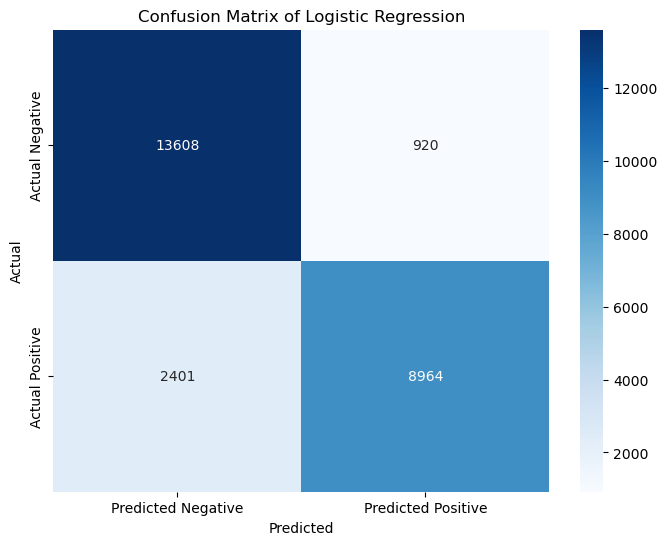

In [35]:
cm = confusion_matrix(test_set_y,predicted)
validation_score = calculate_metrics(cm)
print_calculated_metrcis(validation_score)
confusion_matrix_list= [[cm["TN"],cm["FP"]],[cm["FN"],cm["TP"]]]

plt.figure(figsize=(8, 6))

sns.heatmap(confusion_matrix_list, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.title('Confusion Matrix of Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



<h2>Neural Networks (One hidden- Shallow)</h2>

In [38]:
class NeuralNetworks():

    def __init__(self,parameters,X_data,Y_data,epochs,learning_rate):
        self.parameters = parameters 
        self.X_data= X_data
        self.Y_data = Y_data 
        self.epochs = epochs 
        self.learning_rate = learning_rate
        self.prediction = 0
        

    def sigmoid(self,z):
        return 1/(1+ np.exp(-z))
        
    def tanh(self,x):
        return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

    
            
    def predict_nn(self,activation):
        L = len (self.parameters) // 2
        A = self.X_data
        result= {}
    
        for l in range(1,L+1):      
        
            Z = np.dot(A,self.parameters["W"+str(l)]) + self.parameters["b"+str(l)]

            if  activation[l - 1]== "tanh":
                A = self.tanh(Z)
            elif activation[l - 1] == "sigmoid":
                A = self.sigmoid(Z)
            result["Z"+str(l)]= Z
            result["A"+str(l)] = A
            
        return result

    def get_parameters(self):
        return self.parameters
    
    def get_prediction(self):
        L = len (self.parameters) // 2
        activation = ["tanh","sigmoid"]
        predicted = self.predict_nn(activation)
        self.prediction = predicted["A"+str(L)]
        return self.prediction

    def cost_function_nn(self,predicted_values,real_result):  
        cost = -(np.dot(real_result,np.log(predicted_values + 1e-9))+np.dot(1-real_result,np.log(1-predicted_values+1e-9)))/ real_result.size
        cost = np.squeeze(cost)      
        return cost

    def model_back(self,Y,result,parameters,X):
        W2 = parameters["W2"] 
    
        Z1 = result["Z1"]
        A1 = result["A1"]
        Z2 =result["Z2"]
        A2 =result["A2"]

        Y = np.array([Y]).T
        m = Y.size
    

        dZ2 = A2 - Y
        dW2 = np.dot(A1.T,dZ2)/m
        db2 = np.sum(dZ2, axis=0,keepdims=True)/m
        dZ1 = np.dot(dZ2,W2.T)*(1-np.power(A1,2))
        dW1 = np.dot(X.T,dZ1)/m
        db1 = np.sum(dZ1,axis=0,keepdims=True)/m
   
    
        grads = {"dW1": dW1,"db1": db1,"dW2": dW2,"db2": db2}
   

        return grads

    def update_parameters(self, grads):

        L = len (self.parameters) // 2

        for l in range(1,L+1):
            self.parameters["W"+str(l)] = self.parameters["W"+str(l)] - self.learning_rate*grads["dW"+ str(l)]
            self.parameters["b"+str(l)] = self.parameters["b"+str(l)] - self.learning_rate*grads["db"+str(l)]
        return self.parameters

    def train_nn(self):
        cost_list = []
        activation = ["tanh","sigmoid"]
        # TODO: Add Early Stopping
        patience = 5 
    
        for epoch in range(0,self.epochs):
            # Run forward
            predicted = self.predict_nn(activation)
        
            # Find cost
            cost = self.cost_function_nn(predicted["A2"],self.Y_data)
            cost_list.append(cost)

            # Backpropagate
            grads = self.model_back(self.Y_data,predicted,self.parameters,self.X_data)

            # Update Parameters
            self.parameters = self.update_parameters(grads)
            result = {}
        
        return self.parameters

    

In [39]:
def init_parameters_nn(s_input,s_hidden,s_output):
    
    ## Initliaze parameters in the network 
    W1 = np.random.randn(s_input,s_hidden)*0.01
    b1 = np.zeros((1,s_hidden))
    W2 = np.random.randn(s_hidden,s_output)*0.01
    b2 = np.zeros((1,s_output))

    parameters = {"W1": W1,"b1": b1,"W2": W2,"b2": b2}
    
    return parameters

<h3>Applying K-Flood on Neural Networks</h3>

In [40]:
# Determine Hyperparameters
# number_hidden_list = list(range(5,9))
number_hidden_list = [8]
iteration_list  = [1000]
learning_rate_list = [0.1]
splited_data_set= K_fold_splitting_dataset(5,training_set)
parameters_list = []
record_list = []

for number_hidden in number_hidden_list:
    for iteration in iteration_list:
        for learning_rate in learning_rate_list:
            #Initliaze weights 
            # Apply Algorithms on K-1
            parameters = init_parameters_nn(s_input = len(weights_name_list)-1,s_hidden=number_hidden ,s_output = 1)
            print(f"Learning parameter {learning_rate} and iteration {iteration} hidden {number_hidden} ")
            temp_store_values = []
            for each_split in range(0,len(splited_data_set)):
                # Taking out validation set
                for t_i in range(0,len(splited_data_set)):
                    if t_i != each_split:
                        temp.append(splited_data_set[t_i])
                    else:
                        val_set = splited_data_set[each_split]
                for each_temp_split in range(0,len(temp)):
                 ##Train the data set on remained sets 
                    traning_set_y = temp[each_temp_split]["satisfaction"]

                    traning_set_x = temp[each_temp_split].drop(columns=["satisfaction"])
                    traning_set_x = traning_set_x.values

                    model = NeuralNetworks(parameters=parameters,epochs=iteration,learning_rate=learning_rate,X_data=traning_set_x,Y_data=traning_set_y)
                    model.train_nn()
                    parameters = model.get_parameters()

                # Check the validation score
                val_set_y = val_set["satisfaction"].values
                val_set_x = val_set.drop(columns=["satisfaction"])
                val_set_x = val_set_x.values

                model_val = NeuralNetworks(parameters=parameters,epochs=iteration,learning_rate=learning_rate,X_data=val_set_x,Y_data=val_set_y)
                
                predicted_nn_value = model_val.get_prediction()
                predicted_nn = (predicted_nn_value>0.6).astype(int)
                cm_nn = confusion_matrix(val_set_y,predicted_nn)
                validation_score_nn = calculate_metrics(cm_nn)
                temp_store_values.append(validation_score_nn)
                
                temp =[]

            epoch_value = {
                "Accuracy": 0,
                "Precission": 0,
                "Recall": 0,
                "F1 Score ": 0
                } 
        
            # Taking average of all parameteres
            for val_value in range(len(temp_store_values)):
                epoch_value["Accuracy"] += temp_store_values[val_value]["Accuracy"] 
                epoch_value["Precission"] += temp_store_values[val_value]["Precission"] 
                epoch_value["Recall"] += temp_store_values[val_value]["Recall"] 
                epoch_value["F1 Score "] += temp_store_values[val_value]["F1 Score "]

                if val_value == len(temp_store_values) - 1:
                    epoch_value["Accuracy"] = epoch_value["Accuracy"]/(len(temp_store_values))
                    epoch_value["Precission"] = epoch_value["Precission"]/(len(temp_store_values))
                    epoch_value["Recall"] = epoch_value["Recall"]/(len(temp_store_values))
                    epoch_value["F1 Score "] = epoch_value["F1 Score "]/(len(temp_store_values))

            print_calculated_metrcis(epoch_value)
            print(" ")
            
            # record the result on list 
            record_list.append({"learning_rate": learning_rate,"iteration":iteration,"number_hidden":number_hidden,"parameters":parameters,"epoch":epoch_value})
            temp_mean =[]
            parameters_list.append(parameters)
      


Learning parameter 0.1 and iteration 1000 hidden 8 

Metrics:
Accuracy: 0.94
Precision: 0.96
Recall: 0.90
F1 Score: 0.93
 


<h3>Putting Test into Trained NN</h3>

In [55]:
model_test = NeuralNetworks(parameters=record_list[9]["parameters"],epochs=record_list[9]["iteration"],learning_rate=record_list[9]["learning_rate"],X_data=test_set_x,Y_data=test_set_y)

predicted_test_nn_value = model_test.get_prediction() 
predicted_nn = (predicted_test_nn_value>0.6).astype(int)


<h3>Confusion Matrix - Neural Networks</h3>


Metrics:
Accuracy: 0.94
Precision: 0.96
Recall: 0.89
F1 Score: 0.93


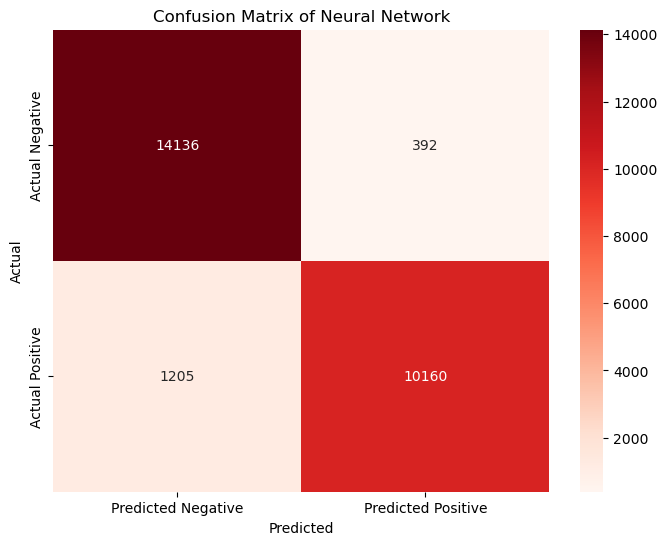

In [56]:
cm_nn = confusion_matrix(test_set_y,predicted_nn)
validation_score_nn = calculate_metrics(cm_nn)
print_calculated_metrcis(validation_score_nn)
confusion_matrix_list_nn= [[cm_nn["TN"],cm_nn["FP"]],[cm_nn["FN"],cm_nn["TP"]]]


plt.figure(figsize=(8, 6))

sns.heatmap(confusion_matrix_list_nn, annot=True, fmt='d', cmap='Reds', xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.title('Confusion Matrix of Neural Network')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<h2>Support Vector Machine (SVM)</h2>

In [59]:
class SVM:

    def __init__(self, learning_rate, lambda_param, n_iters, w, b):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = w
        self.b = b
        

    def cost(self,output_of_svm):
        # Hinge loss per sample: max(0, 1 - margin)
        loss_values = np.maximum(0, 1 - output_of_svm)

        # Compute total loss = regularization + average hinge loss
        loss = self.lambda_param * np.sum(self.w**2) + np.mean(loss_values)
    
        return loss
    
    def get_parameters(self):
        return self.w , self.b


    def fit(self, X, y):
        n_samples, n_features = X.shape

        y_ = np.where(y <= 0, -1, 1)


        total_cost = []
        for i in range(self.n_iters):
            cost_temp = []
            for idx, x_i in enumerate(X):
                forward_run = y_[idx] * (np.dot(x_i, self.w) - self.b)
                cost = self.cost(forward_run)
                cost_temp.append(cost)
                condition = forward_run >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]
            cost_temp = np.array(cost_temp)        
            total_cost.append(float(np.mean(cost_temp)))

        return total_cost

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        approx = np.sign(approx)
        approx = np.where(approx <= -1, 0, 1)
        return approx
    

def init_weights_svm(number_of_features):
    # init weights
    W = np.zeros(number_of_features)
    b = 0

    parameteres = {
        "W": W,
        "b": b
    }

    return parameteres

<h3>Train SVM Model</h3>

In [ ]:
iterations_list_svm = [500]
lambda_parameteres_svm  = [0.001]
lr_parameteres_svm = [0.001]
splited_data_set= K_fold_splitting_dataset(5,training_set)
counter = 0 
record_list_svm = []
n_samples, n_features = training_set.shape
parameters = init_weights_svm(training_set.shape[1]-1)

np.random.seed(38)

# Applying K- fold Cross Validation 

for iteration in iterations_list_svm :
    for lr in lr_parameteres_svm:
        for lambda_svm in lambda_parameteres_svm:
            
                print(f"Learning parameter:{lr} and iteration:{iteration} lambda:{lambda_svm} ")
                temp_store_values = []
                temp =[]
                start_time = time.time()
                parameters = init_weights_svm(training_set.shape[1]-1)
                for each_split in range(0,len(splited_data_set)):
                    print(each_split)
                    # Taking out validation set
                    for t_i in range(0,len(splited_data_set)):
                        if t_i != each_split:
                            temp.append(splited_data_set[t_i])
                        else:
                            val_set = splited_data_set[each_split]
                    for each_temp_split in range(0,len(temp)):
                    ##Train the data set on remained sets 
                    
                        traning_set_y = temp[each_temp_split]["satisfaction"]

                        traning_set_x = temp[each_temp_split].drop(columns=["satisfaction"])
                        traning_set_x = traning_set_x.values

                        w = parameters['W']
                        b = parameters['b']

                        model = SVM(n_iters=iteration,lambda_param=lambda_svm,learning_rate=lr,w=w,b= b)
                        cost = model.fit(X=traning_set_x,y=traning_set_y)
                        parameters["W"], parameters["b"] = model.get_parameters()

                    # Check the validation score
                    val_set_y = val_set["satisfaction"].values
                    val_set_x = val_set.drop(columns=["satisfaction"])
                    val_set_x = val_set_x.values

                    model_val = SVM(n_iters=iteration,lambda_param=lambda_svm,learning_rate=lr,w=parameters["W"],b= parameters["b"])
                
                    predicted_svm_value = model_val.predict(val_set_x)
                    cm_svm = confusion_matrix(val_set_y,predicted_svm_value)
                    validation_score_svm = calculate_metrics(cm_svm)
                
                    temp_store_values.append(validation_score_svm)
                
                    temp =[]

                epoch_value = {
                "Accuracy": 0,
                "Precission": 0,
                "Recall": 0,
                "F1 Score ": 0
                } 
        
                # Taking average of all parameteres
                for val_value in range(len(temp_store_values)):
                    epoch_value["Accuracy"] += temp_store_values[val_value]["Accuracy"] 
                    epoch_value["Precission"] += temp_store_values[val_value]["Precission"] 
                    epoch_value["Recall"] += temp_store_values[val_value]["Recall"] 
                    epoch_value["F1 Score "] += temp_store_values[val_value]["F1 Score "]

                if val_value == len(temp_store_values) - 1:
                    epoch_value["Accuracy"] = epoch_value["Accuracy"]/(len(temp_store_values))
                    epoch_value["Precission"] = epoch_value["Precission"]/(len(temp_store_values))
                    epoch_value["Recall"] = epoch_value["Recall"]/(len(temp_store_values))
                    epoch_value["F1 Score "] = epoch_value["F1 Score "]/(len(temp_store_values))

                end_time = time.time()
                elasped_time = end_time-start_time
                print_calculated_metrcis(epoch_value)
                print(f"{elasped_time:.2f}")
                print(" ")
                counter += 1
            
                # record the result on list 
                record_list_svm.append({"learning_rate": lr,"iteration":iteration,"lambda":lambda_svm,"parameters":parameters,"epoch":epoch_value})
                temp_mean =[]
           

            

Learning parameter:0.001 and iteration:500 lambda:0.001 c : 0.01 list number:0 
0
1
2
3
4

Metrics:
Accuracy: 0.86
Precision: 0.87
Recall: 0.79
F1 Score: 0.83
1994.39
 
Learning parameter:0.001 and iteration:500 lambda:0.001 c : 1 list number:1 
0
1
2
3
4

Metrics:
Accuracy: 0.88
Precision: 0.88
Recall: 0.82
F1 Score: 0.85
1920.81
 
Learning parameter:0.001 and iteration:500 lambda:0.001 c : 3 list number:2 
0
1
2
3
4

Metrics:
Accuracy: 0.88
Precision: 0.88
Recall: 0.83
F1 Score: 0.85
1965.09
 


<h3>Confusion Matrix SVM</h3>

In [202]:
modeltest = SVM(n_iters=record_list_svm[2]["iteration"],
                lambda_param=record_list_svm[2]["lambda"],
                learning_rate=record_list_svm[2]["learning_rate"],
                w=record_list_svm[2]["parameters"]["W"],
                b= record_list_svm[2]["parameters"]["b"],
                c=record_list_svm[2]["c"] )

result = modeltest.predict(test_set_x)


Metrics:
Accuracy: 0.87
Precision: 0.88
Recall: 0.82
F1 Score: 0.85


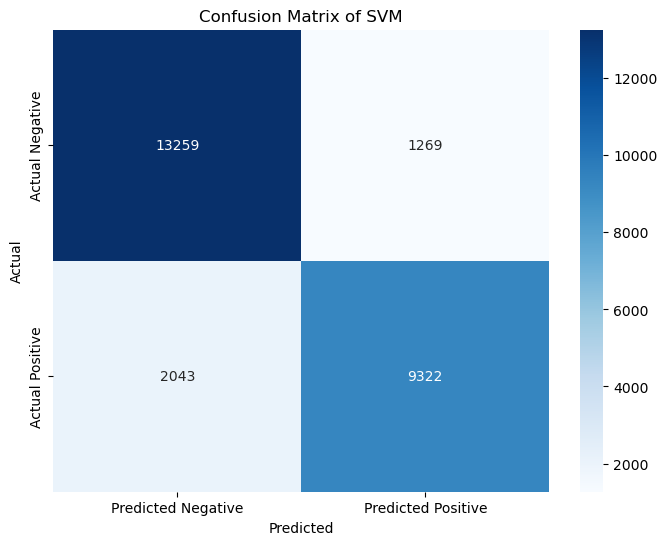

In [203]:
cm_svm = confusion_matrix(test_set_y,result)
validation_score_svm = calculate_metrics(cm_svm)
print_calculated_metrcis(validation_score_svm)


confusion_matrix_list_svm= [[cm_svm["TN"],cm_svm["FP"]],[cm_svm["FN"],cm_svm["TP"]]]


plt.figure(figsize=(8, 6))

sns.heatmap(confusion_matrix_list_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.title('Confusion Matrix of SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<h2>Random Forest</h2>

In [58]:
from collections import Counter

class Node:
    def __init__(self,feature_index= None, threshold=None,left=None,right= None,*, value = None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value 

    def is_leaf_node(self):
        return self.value is not None 

def split_dataset(X, y, feature_idx, threshold):
        """Split dataset into left and right subsets based on a feature threshold."""
        left_mask = X[:, feature_idx] <= threshold
        right_mask = ~left_mask
        return X[left_mask], y[left_mask], X[right_mask], y[right_mask]


def most_common_label(y):
    """Return the most common class label in y."""
    counter = Counter(y)
    return counter.most_common(1)[0][0]

class DecisionTree:
    def __init__(self,max_depth= 10, min_samples_split = 2, n_features = None):
        np.random.seed(38)
        self.min_samples_split= min_samples_split
        self.max_depth = max_depth
        self.n_features = n_features
        self.root = None

    def predict(self,X):
        return np.array([self.predict_one(row) for row in X])
    
    def predict_one(self,X):
        current = self.root
        while current.value is None:
            if X[current.feature_index] <= current.threshold:
                current = current.left
            else:
                current = current.right
        return current.value

    def gini_impurity(self,input):
        classes, counts = np.unique(input, return_counts = True)
        p = counts /counts.sum()
        return 1.0 - np.sum(p**2)
    

    def fit(self,train_X, train_Y):
        if self.n_features is None:
            self.n_features = train_X.shape[1] 
        self.root = self.grow_tree(train_X,train_Y,depth=0)

    def grow_tree(self, train_X, train_Y, depth):
        n_sample, n_feats = train_X.shape
        n_labels = len(np.unique(train_Y)) 

        # check the stopping criteria 
        if (depth >= self.max_depth or n_labels == 1 or n_samples<self.min_samples_split) :
            leaf_value = most_common_label(train_Y)
            return Node(value = leaf_value)

        feat_idxs = np.random.choice(n_feats,self.n_features,replace=False)

        # find the best split 
        best_feature, best_thresh = self.best_split(train_X,train_Y,feat_idxs)
        
        # If no improvement, return leaf
        if best_feature is None:
            leaf_value = most_common_label(y)
            return Node(value=leaf_value)

        # create child nodes
        X_left, y_left, X_right, y_right = split_dataset(train_X, train_Y, best_feature, best_thresh)
        left = self.grow_tree(X_left,y_left,depth+1)
        right = self.grow_tree(X_right,y_right,depth+1)
        return Node(feature_index=best_feature, threshold=best_thresh,left=left,right=right)
    
    def best_split(self, train_X, train_Y, feat_idxs):
        best_gain = 0.0
        best_feature, best_threshold = None, None
        current_impurity = self.gini_impurity(y)
        n_samples = train_X.shape[0]

        for feat in feat_idxs:
            values = np.unique(train_X[:, feat])
            for threshold in values : 
                X_left, y_left, X_right, y_right = split_dataset(train_X, train_Y, feat, threshold)
                p_left = len(y_left) / n_samples
                p_right = 1 - p_left
                gain = current_impurity - (p_left * self.gini_impurity(y_left) + p_right * self.gini_impurity(y_right))
                if gain > best_gain:
                        best_gain = gain
                        best_feature = feat
                        best_threshold = threshold

        return best_feature, best_threshold


In [ ]:
class RandomForest:
    """A simple random forest classifier for binary classification."""
    def __init__(self, n_trees=10, max_depth=5, min_samples_split=2, max_features=8,trees=[]):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.max_features = max_features
        self.trees = trees


    def bootstrap_sample(self, X, y):
        """Create a bootstrap sample from X and y."""
        n = len(X)
        indices = np.random.randint(0, n, n)
        return X[indices], y[indices]

    def fit(self, X, y):
        n_features_total = X.shape[1]
        n_features_sub = self.max_features

        self.trees = []
        for j in range(self.n_trees):
            # Bootstrap sample
            
            X_sample, y_sample = self.bootstrap_sample(X, y)
            # Train a decision tree
            tree = DecisionTree(max_depth=self.max_depth,
                                min_samples_split=self.min_samples_split,
                                n_features=n_features_sub)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)
            
            

    def predict(self, X):
        # Get predictions from all trees
        tree_preds = [tree.predict(X) for tree in self.trees]
        # Convert to array (n_trees, n_samples)
        tree_preds = np.array(tree_preds)
        # Majority vote: sum along trees, if > half trees say 1, predict 1 else 0
        summed_predictions = np.sum(tree_preds, axis=0)
        # Majority vote threshold
        final_preds = (summed_predictions > self.n_trees / 2).astype(int)
        return final_preds
    
    def get_trees(self):
        return self.trees


<h3>Train the Random Forest</h3>

In [83]:
# Predict on training set
# Create a permutation of indices from 0 to n_samples-1
np.random.seed(1)


traning_set_y = training_set["satisfaction"]
traning_set_x = training_set.drop(columns=["satisfaction"])
traning_set_x = traning_set_x.values
   
print(traning_set_x.shape)

(103904, 22)


In [85]:
n_trees_list = [3,5,10]
max_depth_list = [5,6,7]
max_feature_list = [10,15,22]
splited_data_set= K_fold_splitting_dataset(5,training_set)
counter = 0 
record_list_rm = []
n_samples, n_features = training_set.shape


for ma_feature in max_feature_list:
    for max_depth in max_depth_list:
        for n_trees in n_trees_list:
            trees = []
            print(f" Features {ma_feature}  Max Depth {max_depth}  Number of Trees : {n_trees} ")
            temp_store_values = []
            temp =[]
            start_time = time.time()
            

            for each_split in range(0,len(splited_data_set)):
                
                # Taking out validation set
                for t_i in range(0,len(splited_data_set)):
                    if t_i != each_split:
                        temp.append(splited_data_set[t_i])
                    else:
                        val_set = splited_data_set[each_split]
                for each_temp_split in range(0,len(temp)):
                    ##Train the data set on remained sets 
                    
                    traning_set_y = temp[each_temp_split]["satisfaction"].values
                    traning_set_x = temp[each_temp_split].drop(columns=["satisfaction"])
                    traning_set_x = traning_set_x.values 
                
                    model = RandomForest(n_trees=n_trees, max_depth=max_depth,max_features=ma_feature,trees=trees)
                    model.fit(traning_set_x,traning_set_y)
                    trees = model.trees

                # Check the validation score
                val_set_y = val_set["satisfaction"]
                val_set_x = val_set.drop(columns=["satisfaction"])
                val_set_x = val_set_x.values

                model_val = RandomForest(n_trees=n_trees, max_depth=max_depth,max_features=ma_feature,trees=trees)
                
                predicted_rm_value = model_val.predict(val_set_x)
                cm_rm = confusion_matrix(val_set_y,predicted_rm_value)
                validation_score_rm = calculate_metrics(cm_rm)
                
                temp_store_values.append(validation_score_rm)
                
                temp =[]

            epoch_value = {
                "Accuracy": 0,
                "Precission": 0,
                "Recall": 0,
                "F1 Score ": 0
                } 
        
                # Taking average of all parameteres
            for val_value in range(len(temp_store_values)):
                epoch_value["Accuracy"] += temp_store_values[val_value]["Accuracy"] 
                epoch_value["Precission"] += temp_store_values[val_value]["Precission"] 
                epoch_value["Recall"] += temp_store_values[val_value]["Recall"] 
                epoch_value["F1 Score "] += temp_store_values[val_value]["F1 Score "]

            if val_value == len(temp_store_values) - 1:
                epoch_value["Accuracy"] = epoch_value["Accuracy"]/(len(temp_store_values))
                epoch_value["Precission"] = epoch_value["Precission"]/(len(temp_store_values))
                epoch_value["Recall"] = epoch_value["Recall"]/(len(temp_store_values))
                epoch_value["F1 Score "] = epoch_value["F1 Score "]/(len(temp_store_values))

            end_time = time.time()
            elasped_time = end_time-start_time
            print_calculated_metrcis(epoch_value)
            print(f"{elasped_time:.2f}")
            print(" ")
            counter += 1
            
            # record the result on list 
            record_list_rm.append({"trees":trees,"n trees":n_trees,"Max Depth":max_depth,"Max Features":ma_feature,"epoch":epoch_value})
            temp_mean =[]
           



 Features 10  Max Depth 5  Number of Trees : 3 

Metrics:
Accuracy: 0.91
Precision: 0.91
Recall: 0.88
F1 Score: 0.89
346.98
 
 Features 10  Max Depth 5  Number of Trees : 5 

Metrics:
Accuracy: 0.91
Precision: 0.91
Recall: 0.88
F1 Score: 0.89
569.17
 
 Features 10  Max Depth 5  Number of Trees : 10 

Metrics:
Accuracy: 0.91
Precision: 0.91
Recall: 0.88
F1 Score: 0.89
1109.38
 
 Features 10  Max Depth 6  Number of Trees : 3 

Metrics:
Accuracy: 0.92
Precision: 0.90
Recall: 0.91
F1 Score: 0.90
273.44
 
 Features 10  Max Depth 6  Number of Trees : 5 

Metrics:
Accuracy: 0.92
Precision: 0.90
Recall: 0.91
F1 Score: 0.90
454.46
 
 Features 10  Max Depth 6  Number of Trees : 10 

Metrics:
Accuracy: 0.92
Precision: 0.90
Recall: 0.91
F1 Score: 0.90
902.38
 
 Features 10  Max Depth 7  Number of Trees : 3 

Metrics:
Accuracy: 0.92
Precision: 0.93
Recall: 0.88
F1 Score: 0.90
393.23
 
 Features 10  Max Depth 7  Number of Trees : 5 

Metrics:
Accuracy: 0.91
Precision: 0.93
Recall: 0.85
F1 Score: 0.8

<h3>Confusion Matrix - Random Forest </h3>

In [116]:
# Train a random forest
rf = RandomForest(n_trees=record_list_rm[17]["n trees"], max_depth=record_list_rm[17]["Max Depth"],max_features=record_list_rm[17]["Max Features"],trees=record_list_rm[17]["trees"])



In [117]:
# Compute accuracy
result = rf.predict(test_set_x)
print(result)

accuracy = np.mean(test_set_y == result)*100
print("Training Accuracy:", accuracy)

print(test_set_y)

[1 1 0 ... 0 1 0]
Training Accuracy: 84.41663770130924
[1 1 0 ... 0 1 0]



Metrics:
Accuracy: 0.84
Precision: 0.78
Recall: 0.90
F1 Score: 0.84


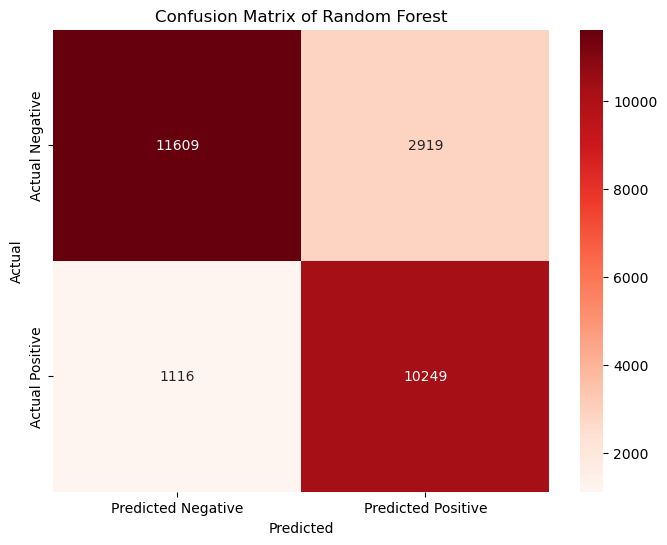

In [118]:
cm_randomforest = confusion_matrix(test_set_y,result)
validation_score_randomforest = calculate_metrics(cm_randomforest)
print_calculated_metrcis(validation_score_randomforest)


confusion_matrix_list_randomforest = [[cm_randomforest["TN"],cm_randomforest["FP"]],[cm_randomforest["FN"],cm_randomforest["TP"]]]


plt.figure(figsize=(8, 6))

sns.heatmap(confusion_matrix_list_randomforest, annot=True, fmt='d', cmap='Reds', xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.title('Confusion Matrix of Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()